In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(suppress=True)  # 关闭科学计数法

In [2]:

data_csv = pd.read_csv("./filtered.csv")#读取filtered file
trajectory = np.array(data_csv, dtype=np.float64)  # trajectory1[:, 2:9] 原为2个数据 现为8个

In [3]:
dataX, dataY = [], []
    # 定义滑动窗口的大小和步长
window_size = 10
step_size = 1

 # 创建输入数据和目标数据

    # 创建输入数据和目标数据





for i in range(0, len(trajectory) - window_size, step_size):
    dataX.append(trajectory[i:i+window_size])
    dataY.append(trajectory[i+window_size,1:3])

 # 将输入数据和目标数据转换为numpy数组
dataX = np.array(dataX, dtype='float64')
dataY = np.array(dataY, dtype='float64')
# dataY = dataY.reshape(2408,1,2)
print('dataX shape:', dataX.shape) # (91, 10, 3)
print('dataY shape:', dataY.shape) # (91, 2)
# 使用transpose()方法交换第二维度和第三维度
dataX = dataX.transpose((0, 2, 1))
print('dataX shape:', dataX.shape)

dataX shape: (2408, 10, 5)
dataY shape: (2408, 2)
dataX shape: (2408, 5, 10)


In [4]:
# calculate distance based on haversine and time difference
# convert time to seconds

train_x = dataX
train_y= dataY

In [5]:
print(train_x)
print(train_y)

[[[     0.          1.          2.     ...      7.          8.
        9.    ]
  [679864.4007 679864.4159 679864.4315 ... 679864.5083 679864.5238
   679864.5391]
  [419283.8057 419284.144  419284.4826 ... 419286.1755 419286.5141
   419286.8528]
  [    11.12       11.12       11.12   ...     11.12       11.12
       11.12  ]
  [     0.          0.          0.     ...      0.          0.
        0.    ]]

 [[     1.          2.          3.     ...      8.          9.
       10.    ]
  [679864.4159 679864.4315 679864.4467 ... 679864.5238 679864.5391
   679864.5546]
  [419284.144  419284.4826 419284.8213 ... 419286.5141 419286.8528
   419287.1914]
  [    11.12       11.12       11.12   ...     11.12       11.12
       11.12  ]
  [     0.          0.          0.     ...      0.          0.
        0.    ]]

 [[     2.          3.          4.     ...      9.         10.
       11.    ]
  [679864.4315 679864.4467 679864.4623 ... 679864.5391 679864.5546
   679864.5699]
  [419284.4826 419284.82

In [6]:
import numpy as np
# convert pandas dataframe to numpy array

x_data = train_x
x_data = np.array(x_data)
# x_data = x_data.reshape(19828,5,1)
x_data.shape

(2408, 5, 10)

# Too Much Slow Step 

In [7]:
y_data = train_y

y_data.shape

(2408, 2)

In [8]:
# Preporcessing Normalizing Valuse

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1,1))
# new_df= x_data.reshape(x_data.shape[0],5)
x_data=x_data.reshape(2408,50)
new_x_data = sc.fit_transform(x_data)
new_x_data = new_x_data.reshape(2408,5,10)

print('X_data shape :', x_data.shape)
print('new X_data shape :', new_x_data.shape)


# y_data=y_data.reshape(2408,2)
new_y_data = sc.fit_transform(y_data)
# new_y_data = new_y_data.reshape(2408,2)
print('y_data shape :', y_data.shape)
print('new y_data shape :', new_y_data.shape)
# print(new_x_data)
print(new_y_data)

X_data shape : (2408, 50)
new X_data shape : (2408, 5, 10)
y_data shape : (2408, 2)
new y_data shape : (2408, 2)
[[-1.         -1.        ]
 [-0.99969315 -0.99884536]
 [-0.99938229 -0.99769038]
 ...
 [ 0.66212312  0.99439013]
 [ 0.65831461  0.99719455]
 [ 0.65450609  1.        ]]


In [10]:
import tensorflow as tf



from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.recurrent import LSTM,RNN
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [11]:
x_train, x_test, y_train, y_test = train_test_split(new_x_data, new_y_data, test_size=0.3, random_state=42)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1685, 5, 10)
(1685, 2)
(723, 5, 10)
(723, 2)


In [ ]:
# import torch
# import torch.nn as nn
# criterion = nn.MSELoss()

In [13]:
from keras import regularizers

from keras.optimizers import Adam

In [85]:
model = Sequential()

# first layer
# model.add(LSTM(units=50, batch_input_shape=(None,5,10),return_sequences=True,kernel_regularizer=regularizers.l2(0.01)))
model.add(LSTM(units=50, batch_input_shape=(None,5,10),return_sequences=True))
model.add(Dropout(0.2))

# second layer
# model.add(Dense(128, 1))
# model.add(LSTM(units=100,return_sequences=True,kernel_regularizer=regularizers.l2(0.01)))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

# third layer
# model.add(LSTM(units=50,return_sequences=False,kernel_regularizer=regularizers.l2(0.01)))
model.add(LSTM(units=50,return_sequences=False))

model.add(Dropout(0.2))

# fourth dense layer
model.add(Dense(units=2))
#不声明默认为0.001
# adam = Adam(learning_rate=0.0015)#减小学习率：可以通过将优化器的learning_rate参数设置为一个较小的值来减小学习率。例如，可以将模型编译代码修改为：

model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])#增加L2正则化项：将kernel_regularizer参数设置为regularizers.l2()，并指定相应的正则化系数。
model.summary()

# # 定义LSTM模型
# model = Sequential()
# model.add(LSTM(64, input_shape=(10, 5)))
# model.add(Dense(2))

# # 编译模型
# model.compile(loss='mse', optimizer='adam')
# model.summary()
'''
# LSTM层的units数：增加units数可以增加模型的表达能力，但也会增加模型的复杂度和训练时间。因此，可以尝试不同的units数并找到一个合适的值。

# Dropout层的比率：增加Dropout比率可以减少过拟合的风险，但过高的Dropout比率会影响模型的性能。因此，可以尝试不同的Dropout比率并找到一个合适的值。

# 学习率(learning rate)：Adam优化器默认的学习率通常可以正常工作，但有时候需要手动调整学习率以加速或稳定训练过程。

# 批量大小(batch size)：批量大小会影响模型的训练速度和内存占用情况。通常情况下，使用大批量大小可以加快训练速度，但也会占用更多的内存。

# 训练轮数(epochs)：增加训练轮数可以提高模型的精度，但也会增加训练时间。可以使用早停法(early stopping)等技术来提高模型的训练效率。
 '''


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 5, 50)             12200     
_________________________________________________________________
dropout_27 (Dropout)         (None, 5, 50)             0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 5, 100)            60400     
_________________________________________________________________
dropout_28 (Dropout)         (None, 5, 100)            0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_29 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                

'\n# LSTM层的units数：增加units数可以增加模型的表达能力，但也会增加模型的复杂度和训练时间。因此，可以尝试不同的units数并找到一个合适的值。\n\n# Dropout层的比率：增加Dropout比率可以减少过拟合的风险，但过高的Dropout比率会影响模型的性能。因此，可以尝试不同的Dropout比率并找到一个合适的值。\n\n# 学习率(learning rate)：Adam优化器默认的学习率通常可以正常工作，但有时候需要手动调整学习率以加速或稳定训练过程。\n\n# 批量大小(batch size)：批量大小会影响模型的训练速度和内存占用情况。通常情况下，使用大批量大小可以加快训练速度，但也会占用更多的内存。\n\n# 训练轮数(epochs)：增加训练轮数可以提高模型的精度，但也会增加训练时间。可以使用早停法(early stopping)等技术来提高模型的训练效率。\n '

In [86]:
history = model.fit(x_train,y_train,epochs=200, batch_size=32,validation_data=(x_test,y_test))

Epoch 1/200
53/53 [==============================] - 8s 35ms/step - loss: 0.2617 - accuracy: 0.7009 - val_loss: 0.1062 - val_accuracy: 0.9267
Epoch 2/200
53/53 [==============================] - 1s 19ms/step - loss: 0.1250 - accuracy: 0.7674 - val_loss: 0.0833 - val_accuracy: 0.8354
Epoch 3/200
53/53 [==============================] - 1s 19ms/step - loss: 0.1175 - accuracy: 0.7525 - val_loss: 0.0903 - val_accuracy: 0.9474
Epoch 4/200
53/53 [==============================] - 1s 18ms/step - loss: 0.1171 - accuracy: 0.7620 - val_loss: 0.0810 - val_accuracy: 0.7621
Epoch 5/200
53/53 [==============================] - 1s 19ms/step - loss: 0.1144 - accuracy: 0.7917 - val_loss: 0.0855 - val_accuracy: 0.7690
Epoch 6/200
53/53 [==============================] - 1s 20ms/step - loss: 0.1095 - accuracy: 0.8030 - val_loss: 0.0944 - val_accuracy: 0.9627
Epoch 7/200
53/53 [==============================] - 1s 19ms/step - loss: 0.1061 - accuracy: 0.8047 - val_loss: 0.0829 - val_accuracy: 0.8866
Epoch 

In [87]:
model.save('D:/浏览器下载/EDGE下载/LSTM_part1/model.h5')

In [88]:
from tensorflow.python.keras.models import load_model
model1 = load_model('D:/浏览器下载/EDGE下载/LSTM_part1/model.h5')

In [89]:
# print(x_test[2:3].shape)
# print(x_test[2:3])
result = model1.predict(x_test)
result


array([[ 0.81890553,  0.85563344],
       [ 0.81912917,  0.85554785],
       [-0.70237076, -0.405404  ],
       ...,
       [ 0.82078046,  0.8542834 ],
       [ 0.81997925,  0.85518163],
       [ 0.81981987,  0.8552646 ]], dtype=float32)

In [90]:
# # 设置打印选项，精度为3位小数
# np.set_printoptions(precision=5, suppress=True)

res_df = sc.inverse_transform(result)
# res_df.reshape(new_df.shape[0],5,1)
res_df
print(res_df.shape)
print(res_df)


(723, 2)
[[679955.25 419831.38]
 [679955.25 419831.34]
 [679879.4  419461.56]
 ...
 [679955.3  419830.97]
 [679955.3  419831.22]
 [679955.3  419831.25]]


In [91]:
y_test=y_test.reshape (723, 2)  #需要改的地方
# y_test_actual=sc.inverse_transform(y_test[2:3])
y_test_actual=sc.inverse_transform(y_test)
print(y_test_actual)
print(y_test_actual.shape)
# for i in range(len(result)):
#     plt.scatter(result[0][i],result[1][i],c='r')
#     plt.scatter(y_test[0][i],y_test[1][i],c='g')

# plt.show()

[[679955.8413 419832.253 ]
 [679955.8419 419832.2448]
 [679878.8793 419458.8907]
 ...
 [679955.8474 419832.1637]
 [679955.844  419832.2116]
 [679955.8437 419832.2183]]
(723, 2)


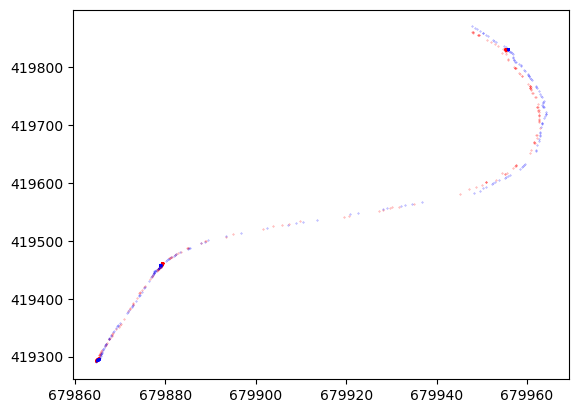

In [92]:
# 绘制预测值和实际值

predicted_df = pd.DataFrame(data=res_df[0:,0:],index=[i for i in range(res_df.shape[0])],columns=['f'+str(i) for i in range(res_df.shape[1])])

actual_df = pd.DataFrame(data=y_test_actual[0:,0:],index=[i for i in range(y_test_actual.shape[0])],columns=['f'+str(i) for i in range(y_test_actual.shape[1])])

# for i in range(len(res_df)):
# #   print(i)
plt.scatter(x=predicted_df['f0'],y=predicted_df['f1'],c='r',s=0.1,alpha=0.5)
plt.scatter(x=actual_df['f0'],y=actual_df['f1'],c='b',s=0.1,alpha=0.5)

plt.show()




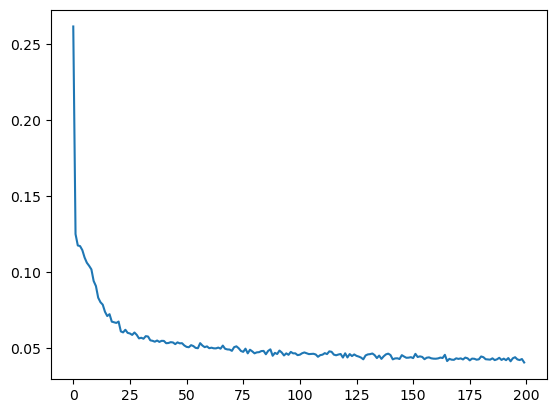

In [93]:
plt.plot(history.history['loss'])
plt.show()

In [94]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # 定义真实定位数据和预测数据
# true_pos = np.array([[1, 2], [3, 4], [5, 6]])
# pred_pos = np.array([[0.5, 1.5], [3.2, 3.9], [4.9, 6.2]])

# 计算均方误差
mse = mean_squared_error(actual_df, predicted_df)
print("MSE:", mse)

# 计算平均绝对误差
mae = mean_absolute_error(actual_df, predicted_df)
print("MAE:", mae)

# 计算相关系数矩阵
corr_matrix = np.corrcoef(actual_df.T, predicted_df.T)
corr_coefficient = corr_matrix[0, 1] # 取出相关系数值
print("相关系数为：", corr_coefficient) # 打印相关系数
# 计算决定系数
r2 = r2_score(actual_df, predicted_df)
print("R^2:", r2)

import numpy as np

# 将实际值和预测值分别存储在矩阵中
actual_matrix = np.array(actual_df)
predicted_matrix = np.array(predicted_df)
correlation_matrix = np.corrcoef(actual_matrix, predicted_matrix, rowvar=False) # 计算相关系数（Pearson相关系数）
correlation_coefficient = correlation_matrix[0, 1] # 提取相关系数矩阵中的相关系数
print("Correlation coefficient:", correlation_coefficient) # 打印相关系数



MSE: 4.950070604742225
MAE: 1.2429926694304145
相关系数为： 0.9597269629903625
R^2: 0.9997485417391596
Correlation coefficient: 0.9597269629903625


In [95]:
 #合并两个矩阵
merged_matrix = np.concatenate((y_test_actual, res_df), axis=1)#真实,预测

print(merged_matrix) # 输出合并后矩阵的形状

[[679955.8413  419832.253   679955.25    419831.375  ]
 [679955.8419  419832.2448  679955.25    419831.34375]
 [679878.8793  419458.8907  679879.375   419461.5625 ]
 ...
 [679955.8474  419832.1637  679955.3125  419830.96875]
 [679955.844   419832.2116  679955.3125  419831.21875]
 [679955.8437  419832.2183  679955.3125  419831.25   ]]


In [96]:
import numpy as np



# 计算每行数据中两个点之间的欧式距离
distances = np.linalg.norm(merged_matrix[:, :2] - merged_matrix[:, 2:], axis=1)
print(distances)
np.savetxt('distances.txt', distances)


[ 1.05854603  1.07807083  2.71739466  1.18507406  2.5934589   1.88134743
  9.93505614  2.15186351  1.40529278  0.63132233  4.9916182   2.80879564
  1.40529278  1.33669107  0.67451556  1.58090992  2.3987983   0.57776262
  0.37495185  0.55332526  2.62422119  1.3244698   1.76189223  1.79709139
  2.43187744  2.76088744  1.13203026  4.64103202  2.68577957  2.77819596
  0.68151729  0.60889581  4.23974116  1.8639372   0.76015412  4.60052663
  2.83985546  0.40386874  6.93469904  2.50124456  0.70523445  3.53207833
  0.64137403  1.4185787   1.90877697  3.14974042  4.11592398  5.55054506
  2.77819596  0.83901628  1.23002374  2.77819596  0.28908518  3.44949612
  1.60672476  1.38411274  3.65920177  4.7279718   0.42623522  0.84865789
  2.7318031   1.31061641  3.48680538  0.52609082  1.38475819  0.7824677
  1.03996038 10.71912131  0.87740099  0.57809162  2.50124456  0.98633061
  2.68577957  2.71988553  2.68577957  2.84762899  1.14788077  2.8656092
  1.01529521  2.6146637   1.72904379  1.05762865  0.2

In [ ]:
1.用库
2.分析误差
3.v2x